In [ ]:
# for data visualization
import seaborn as sb
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
from pandas import DataFrame

# for data analysis
from sklearn.linear_model import LinearRegression

In [ ]:
# Read data file
df: DataFrame = pd.read_csv("./data/celcius2fahrenheit.csv")

In [35]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celsius     7 non-null      int64  
 1   fahrenheit  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


In [36]:
# Get the first 5 rows of the data
df.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


<Axes: xlabel='celsius', ylabel='fahrenheit'>

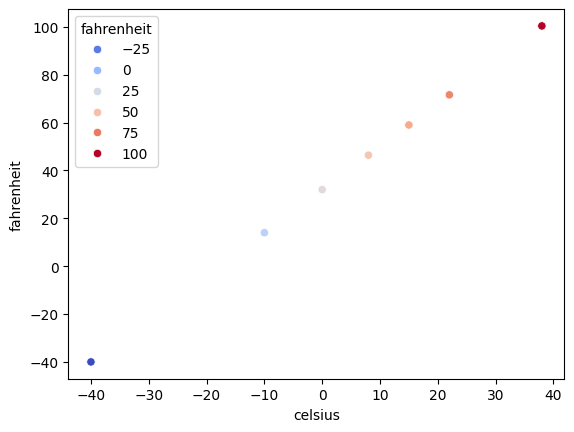

In [37]:
sb.scatterplot(
	data=df, x="celsius", y="fahrenheit",
	hue="fahrenheit", # Color data by fahrenheit
	palette="coolwarm" # Use coolwarm color palette
)

In [38]:
# Separate the data into features (x) and target (y)
x = df["celsius"]
y = df["fahrenheit"]

In [39]:
type(y) # pandas.core.series.Series
type(y.values) # numpy.ndarray
y.values # array([-40, -10,   0,   8,  15,  22,  38])

array([-40. ,  14. ,  32. ,  46.4,  59. ,  71.6, 100.4])

In [40]:
# As the model needs a 2D array, we need to reshape the data
# From: [-40, -10,   0,   8,  15,  22,  38]
# To: [[-40], [-10], [0], [8], [15], [22], [38]]
x_processed = x.values.reshape(-1, 1)
y_processed = y.values.reshape(-1, 1)

In [41]:
# Instantiate the model
model = LinearRegression()

In [42]:
# Fit the model: Train the model
model.fit(x_processed, y_processed)

LinearRegression()

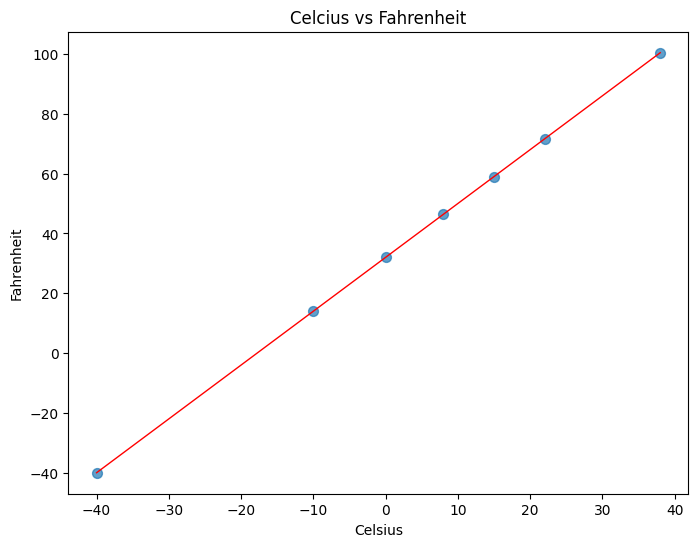

In [48]:
plt.figure(figsize=(8, 6))
sb.regplot(
	data=df, x="celsius", y="fahrenheit",
	scatter_kws={"s": 50, "alpha": 0.7},
	line_kws={"color": "red", "linewidth": 1}
)
plt.title("Celcius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
# plt.grid(True)
plt.show()

In [44]:
# Test the model with a new data: predict fahrenheit from celsius
model.predict([[7900]])

array([[14252.]])

In [45]:
# Get the coefficient of the model
model.score(x_processed, y_processed)

1.0